> # Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
missing_values = df.isnull().sum()
missing_values

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [5]:
duplicate = df.duplicated().sum()
duplicate

0

In [6]:
df.drop(columns="show_id", inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


> # **Visualizations**

**Compare Between Movies and TV Shows By Time**

<Figure size 1400x700 with 0 Axes>

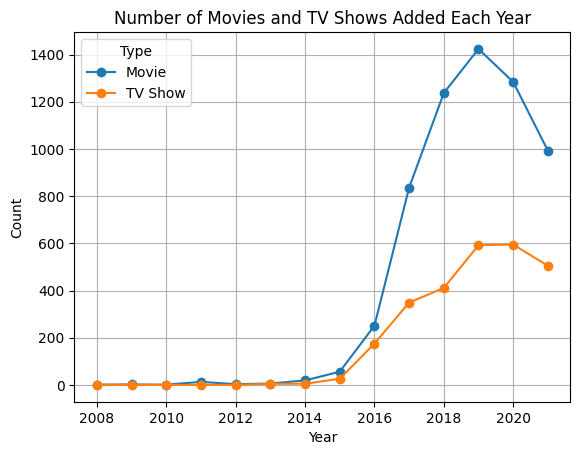

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
content_per_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
content_per_year.plot(kind='line', marker='o')
plt.title('Number of Movies and TV Shows Added Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.grid(True)
plt.show()


**Know The Top 10 Directors**

In [8]:
director_counts = df['director'].value_counts()
director_counts

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
...,...
Matt D'Avella,1
Parthiban,1
Scott McAboy,1


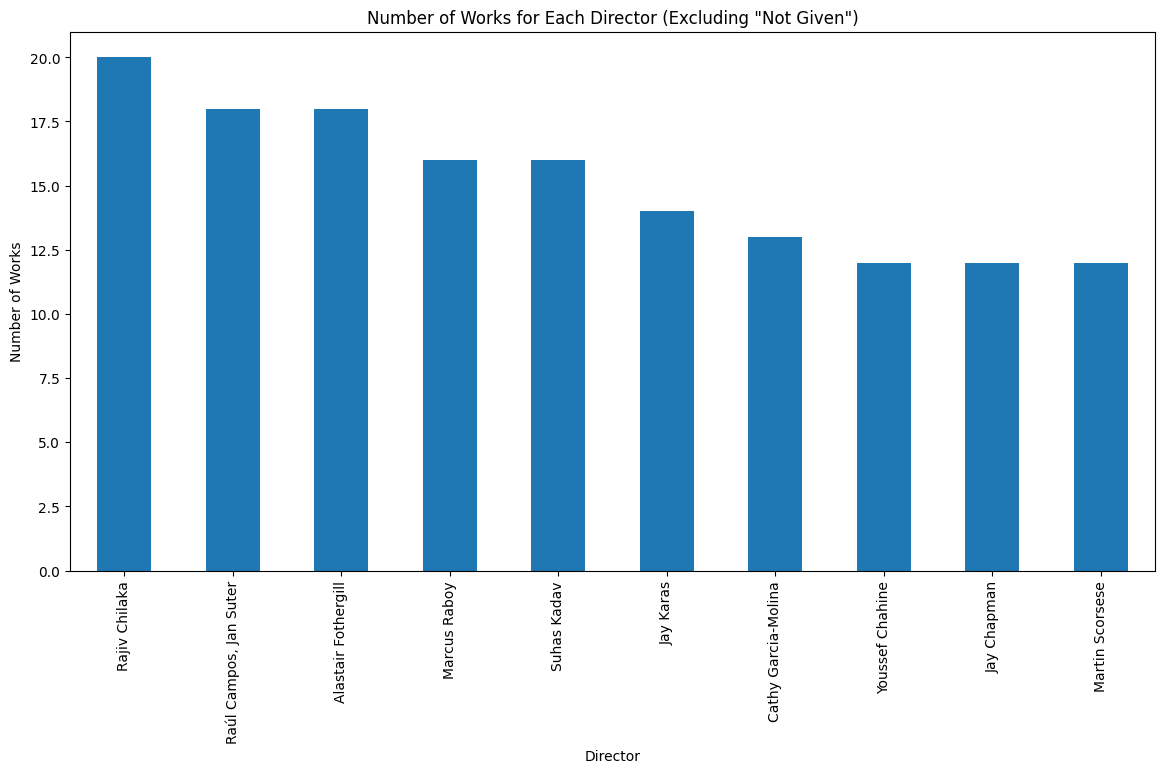

In [9]:
director_filtered = df[df['director'] != 'Not Given']
director_counts = director_filtered['director'].value_counts().head(10)

plt.figure(figsize=(14, 7))
director_counts.plot(kind='bar')
plt.title('Number of Works for Each Director (Excluding "Not Given")')
plt.xlabel('Director')
plt.ylabel('Number of Works')
plt.xticks(rotation=90)
plt.show()


**The percentages between Movies and TV shows**

In [10]:
type_counts = df['type'].value_counts()
percentages = (type_counts / type_counts.sum()) * 100
percentages

,count
type,
Movie,69.692833
TV Show,30.307167


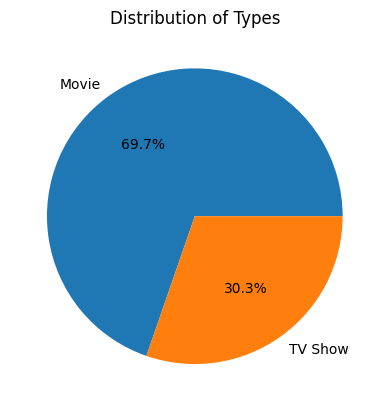

In [11]:
type_counts = df['type'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()

**The Best 50 Countries with Number of Movies and TV Shows**

In [12]:
country_counts = df['country'].value_counts()
country_df = country_counts.reset_index()
country_df.columns = ['country', 'count']
country_df = country_df.sort_values(by='count', ascending=False).head(50)
country_df

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


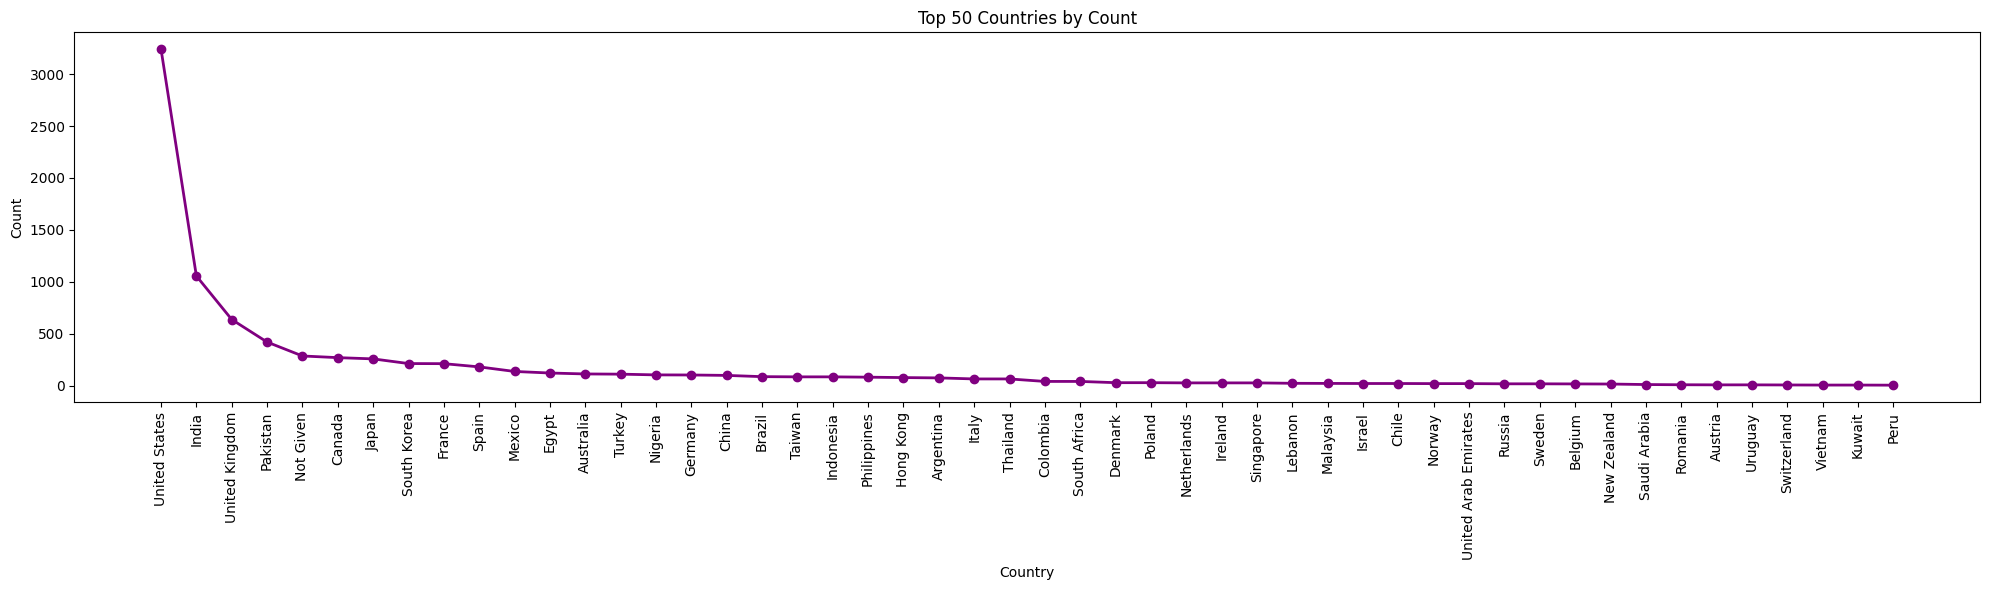

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(country_df['country'], country_df['count'], marker='o', color='purple', linestyle='-', linewidth=2)
plt.xticks(rotation=90)
plt.title('Top 50 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
#plt.grid(True)
plt.tight_layout()
plt.show()


**Distribution of Durations**

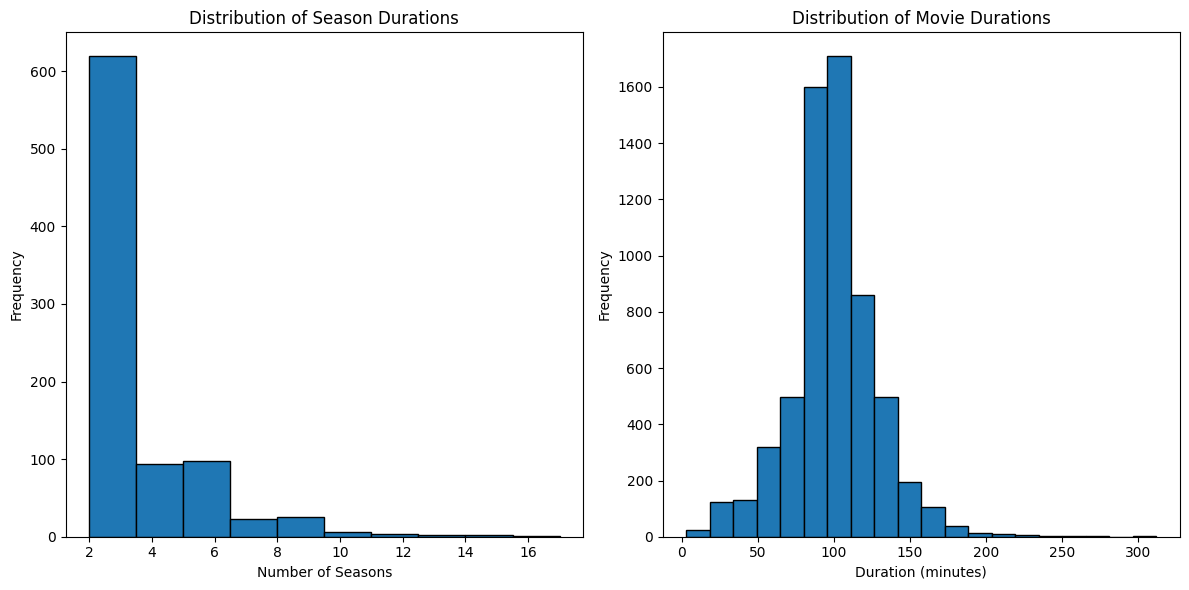

In [14]:
df[['value', 'type']] = df['duration'].str.split(' ', expand=True)
df['value'] = df['value'].astype(int)

plt.figure(figsize=(12, 6))

# Plot for Seasons
plt.subplot(1, 2, 1)
plt.hist(df[df['type'] == 'Seasons']['value'], bins=10, edgecolor='black')
plt.title('Distribution of Season Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')

# Plot for Movies
plt.subplot(1, 2, 2)
plt.hist(df[df['type'] == 'min']['value'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

 **Rating Figure Using Seaborn**

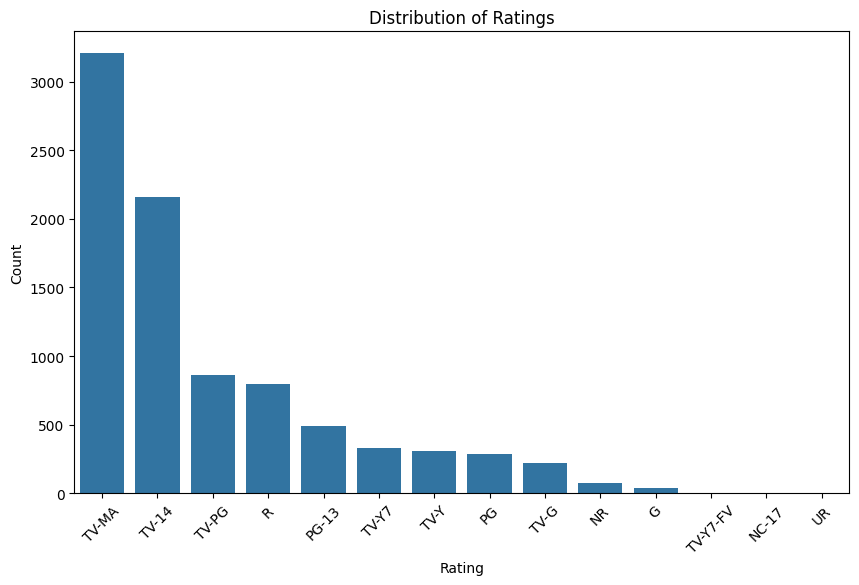

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Categories of Movies and TV Shows by Plotly**

In [16]:
df['listed_in'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('listed_in')
genre_counts = df_exploded['listed_in'].value_counts()

fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             labels={'x': 'listed_in', 'y': 'Count'},
             title='Categories')
fig.show()
